# Задача 2

Параболическая задача [решение](hw-2-4-2-1.pdf)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

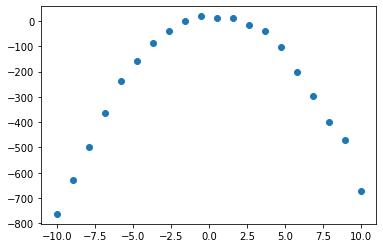

In [11]:
test_poly = Polynomial([13, 5, -7])
x = np.linspace(-10, 10, 20)
y = test_poly(x) + np.random.normal(0, 20, size=x.size)
plt.scatter(x, y)

In [15]:
def parabolic_regression(x, y):
    x_4 = np.mean(x ** 4)
    x_3 = np.mean(x ** 3)
    x_2 = np.mean(x ** 2)
    x_1 = np.mean(x ** 1)
    yx_2 = np.mean(y * x ** 2)
    yx_1 = np.mean(y * x)
    y_1 = np.mean(y)
    A = np.array([[x_4, x_3, x_2], [x_3, x_2, x_1], [x_2, x_1, 1]])
    b = np.array([yx_2, yx_1, y_1])
    w = np.linalg.solve(A, b)
    return w

[25.92679821  5.89068823 -7.38521604]


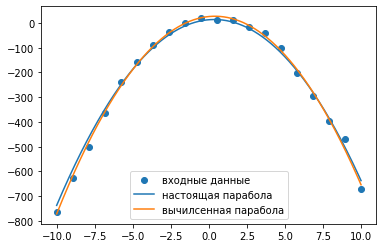

In [23]:
w = parabolic_regression(x, y)
print(w[::-1])
poly_solution = Polynomial(w[::-1])

plt.scatter(x, y, label="входные данные")
plt.plot(np.linspace(-10, 10, 1000), test_poly(np.linspace(-10, 10, 1000)), label=f"настоящая парабола")
plt.plot(np.linspace(-10, 10, 1000), poly_solution(np.linspace(-10, 10, 1000)), label="вычилсенная парабола")

plt.legend()
plt.show()

Гиперболическая задача [решениеfig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)](hw-2-4-2-2.pdf)  
$\hat{a} y^2 - \hat{b} x^2 = 1$

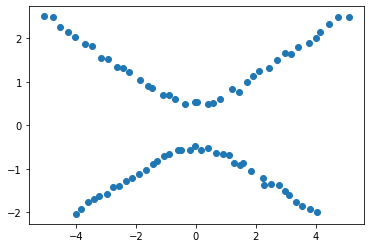

In [83]:
# 4 y^2 - x^2 = 1
def upper_hyperbola(x, a, b):
    return np.sqrt((1 + b * x ** 2) / a)

x = np.linspace(-5, 5, 40)
y = upper_hyperbola(x, 4, 1)
x_ = np.linspace(-4, 4, 39)
y_ = -upper_hyperbola(x_, 4, 1)
x = np.hstack((x, x_))
y = np.hstack((y, y_))
x += np.random.normal(0, 0.05, x.size)
y += np.random.normal(0, 0.05, x.size)

plt.scatter(x, y)

In [81]:
def hyperbolic_regression(x, y):
    x_4 = np.mean(x**4)
    x_2 = np.mean(x**2)
    x_1 = np.mean(x)
    y_4 = np.mean(y**4)
    y_2 = np.mean(y**2)
    y_1 = np.mean(y)
    xy_22 = np.mean(x ** 2 * y ** 2)
    xy_11 = np.mean(x * y)
    A = np.array([[x_4, -xy_22],[xy_22, -y_4]])
    b = -np.array([x_1 + x_2 + xy_11, y_1 + y_2 + xy_11])
    w = np.linalg.solve(A, b)
    return w

[1.19778741 4.86294394]


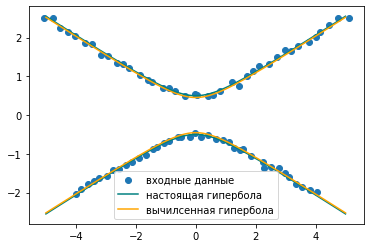

In [84]:
w = hyperbolic_regression(x, y)
print(w)
x_lin = np.linspace(-5, 5, 100)

plt.scatter(x, y, label="входные данные")
plt.plot(x_lin, upper_hyperbola(x_lin, 4, 1), color="teal", label="настоящая гипербола")
plt.plot(x_lin, -upper_hyperbola(x_lin, 4, 1), color="teal")
plt.plot(x_lin, upper_hyperbola(x_lin, w[1], w[0]), color="orange", label="вычилсенная гипербола")
plt.plot(x_lin, -upper_hyperbola(x_lin, w[1], w[0]), color="orange")


plt.legend()
plt.show()

# Задача 3

степенная регрессия   
[решение](hw-2-4-2-3.pdf)

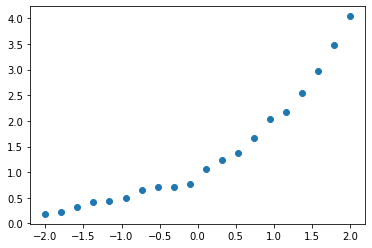

In [129]:
def exponent(x, a, b):
    return a * np.exp(x * np.log(b))

x = np.linspace(-2, 2, 20)
y = exponent(x, 1, 2) + np.random.normal(0, 0.05, x.size)

plt.scatter(x, y)

In [130]:
def exponential_regression(x, y):
    y_log = np.log(y)
    res = Polynomial.fit(x, y_log, 1)
    w_log = res.convert().coef
    w = np.exp(w_log)
    return w

[0.95671046 2.07974196]


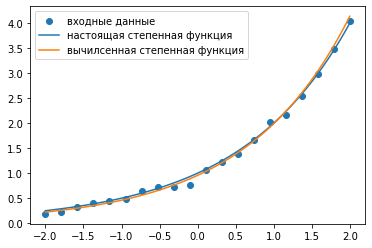

In [132]:
w = exponential_regression(x, y)
print(w)
x_lin = np.linspace(-2, 2, 100)

plt.scatter(x, y, label="входные данные")
plt.plot(x_lin, exponent(x_lin, 1, 2), label="настоящая степенная функция")
plt.plot(x_lin, exponent(x_lin, w[0], w[1]), label="вычилсенная степенная функция")

plt.legend()
plt.show()

# Задача 4
показательная регрессия [решение](hw-2-4-2-3.pdf)

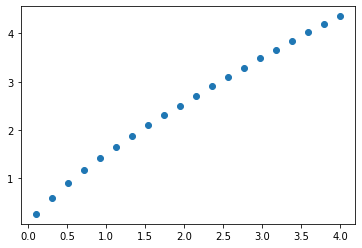

In [146]:
x = np.linspace(0.1, 4, 20)
y = 1.5 * x ** (0.77) + np.random.normal(0, 0.01, x.size)

plt.scatter(x, y)

In [144]:
def power_regression(x, y):
    x_log = np.log(x)
    y_log = np.log(y)
    w_log = Polynomial.fit(x_log, y_log, 1).convert().coef
    w = np.array([np.exp(w_log[0]), w_log[1]])
    return w
    

[1.50423076 0.76894806]


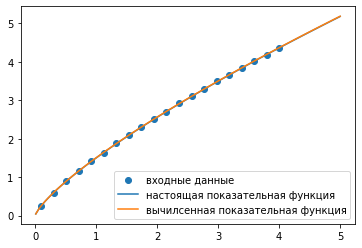

In [149]:
w = power_regression(x, y)
print(w)
x_lin = np.linspace(0.01, 5, 100)

plt.scatter(x, y, label="входные данные")
plt.plot(x_lin, 1.5 * x_lin ** (0.77), label="настоящая показательная функция")
plt.plot(x_lin, w[0] * x_lin ** w[1], label="вычилсенная показательная функция")

plt.legend()
plt.show()

# Задача 6

In [151]:
from mpl_toolkits import mplot3d

In [ ]:
def rastrign_function(x, y):
    return 20 + 

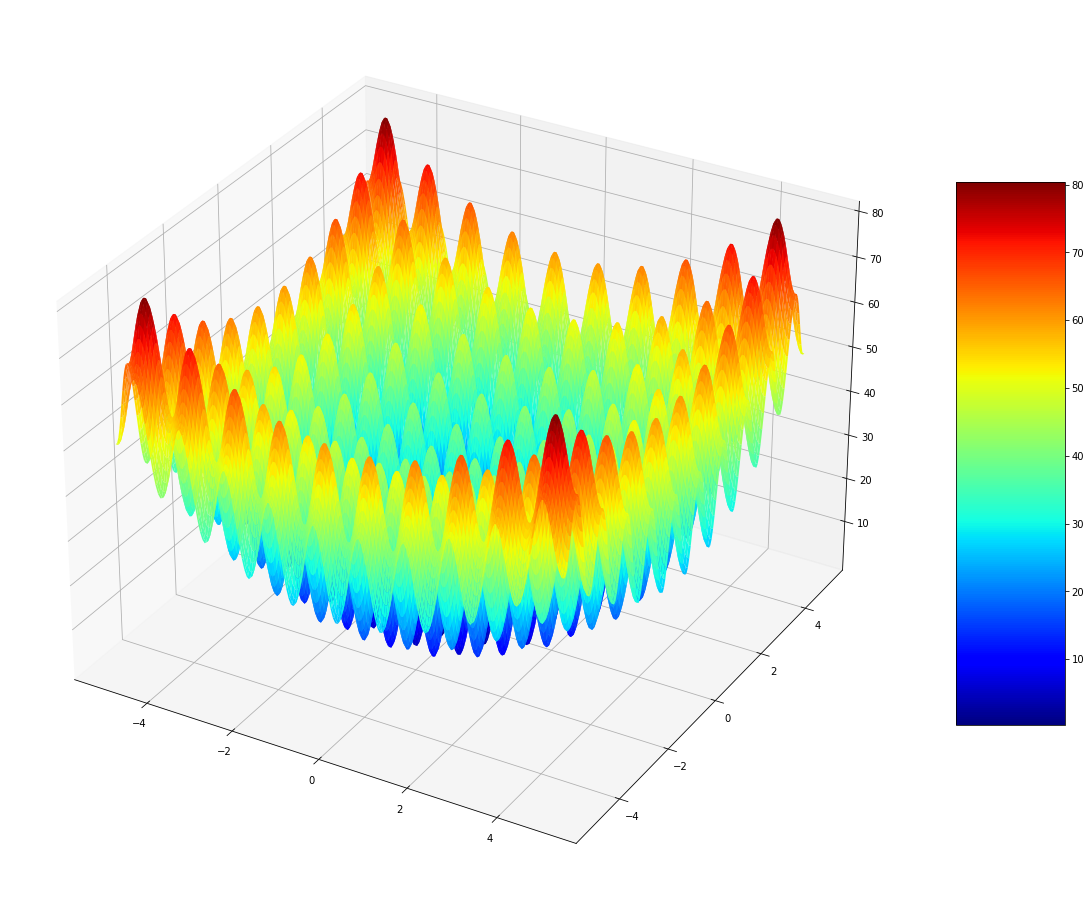

In [187]:
N = 200
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
x, y = np.meshgrid(x, y)
z = rastrign_function(x, y)

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection="3d")

surf = ax.plot_surface(x, y, z, cmap ='jet', rstride=1, cstride=1, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

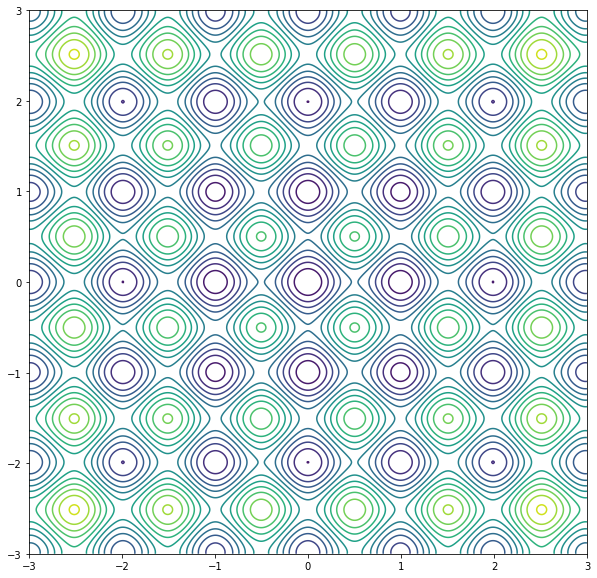

In [195]:
N = 500
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
x, y = np.meshgrid(x, y)
z = rastrign_function(x, y)

fig, ax = plt.subplots(figsize=(10, 10))
ax.contour(x, y, z, 15)

plt.show()